# Action1	"二手车价格预测

used_car_train_20200313.csv

used_car_testB_20200421.csv

数据来自某交易平台的二手车交易记录

https://tianchi.aliyun.com/competition/entrance/231784/introduction

ToDo：给你一辆车的各个属性（除了price字段），预测它的价格
使用神经网络来完成预测"			

"1、使用神经网络完成预测（30points）

2、MAE < 700（20points）"!

In [3]:
import pandas as pd
import numpy as np

In [4]:
#loading
train_data = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv('./used_car_testB_20200421.csv',sep=' ')


train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [19]:
min_date = pd.to_datetime('19910101',format='%Y%m%d')
train_data['regTime'] = (pd.to_datetime(train_data['regDate'],format='%Y%m%d',errors='coerce') - min_date).dt.days

#min_date2 = pd.to_datetime('20150601',format='%Y%m%d')
train_data['creatTime'] = (pd.to_datetime(train_data['creatDate'],format='%Y%m%d',errors='coerce')-min_date).dt.days

train_data['usedTime'] = train_data['creatTime']- train_data['regTime']

#
test_data['regTime'] = (pd.to_datetime(test_data['regDate'],format='%Y%m%d',errors='coerce') - min_date).dt.days

#min_date2 = pd.to_datetime('20150601',format='%Y%m%d')
test_data['creatTime'] = (pd.to_datetime(test_data['creatDate'],format='%Y%m%d',errors='coerce')-min_date).dt.days

test_data['usedTime'] = test_data['creatTime']- test_data['regTime']



train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regTime,creatTime,usedTime
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4840.0,9225,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4442.0,9199,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4841.0,9223,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2077.0,9202,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,7672.0,9203,1531.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [7]:
#notRepairedDamage
train_data['notRepairedDamage'].replace('-','0.0',inplace=True)
test_data['notRepairedDamage'].replace('-','0.0',inplace=True)

train_data['notRepairedDamage'] = train_data['notRepairedDamage'].astype('float64')
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].astype('float64')

train_data['notRepairedDamage'].value_counts()

0.0    135685
1.0     14315
Name: notRepairedDamage, dtype: int64

In [8]:
numerical_cols = train_data.select_dtypes(exclude='object').columns

object_cols = train_data.select_dtypes(include='object').columns

feature_cols = [col for col in numerical_cols if col not in ['SaleID','price']]
feature_cols


['name',
 'regDate',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'creatDate',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'regTime',
 'creatTime',
 'usedTime']

In [20]:
X_data = train_data[feature_cols]
Y_data = train_data['price']

X_test = test_data[feature_cols]

In [21]:
def show_stats(data):
    print('min:', np.min(data))
    print('max:', np.max(data))
    print('ptp:', np.ptp(data))
    print('mean:', np.mean(data))
    print('std:', np.std(data))
    print('var:', np.var(data))
    
show_stats(Y_data)

min: 11
max: 99999
ptp: 99988
mean: 5923.327333333334
std: 7501.973469876438
var: 56279605.94272992


In [22]:
train_data.corr()['price']

SaleID              -0.001043
name                 0.002030
regDate              0.611959
model                0.136983
brand               -0.043799
bodyType             0.241303
fuelType             0.200536
gearbox              0.329075
power                0.219834
kilometer           -0.440519
notRepairedDamage   -0.157523
regionCode           0.014036
seller              -0.002004
offerType                 NaN
creatDate            0.002955
price                1.000000
v_0                  0.628397
v_1                  0.060914
v_2                  0.085322
v_3                 -0.730946
v_4                 -0.147085
v_5                  0.164317
v_6                  0.068970
v_7                 -0.053024
v_8                  0.685798
v_9                 -0.206205
v_10                -0.246175
v_11                -0.275320
v_12                 0.692823
v_13                -0.013993
v_14                 0.035911
regTime              0.610593
creatTime            0.016916
usedTime  

In [23]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [24]:
#!pip uninstall xgboost

In [29]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimator=500, learning_rate=0.1, max_depth=7,objective ='reg:squarederror')
model.fit(X_data, Y_data)
predict_y = model.predict(X_test)
show_stats(predict_y)

min: -796.202
max: 92355.81
ptp: 93152.016
mean: 5909.474
std: 7341.0967
var: 53891704.0


In [30]:
result = pd.DataFrame()
result['SaleID'] = test_data['SaleID']
result['price'] = predict_y
result[result['price']<11]['price'] = 11
result.to_csv('./ans_xgb.csv',index=False)

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


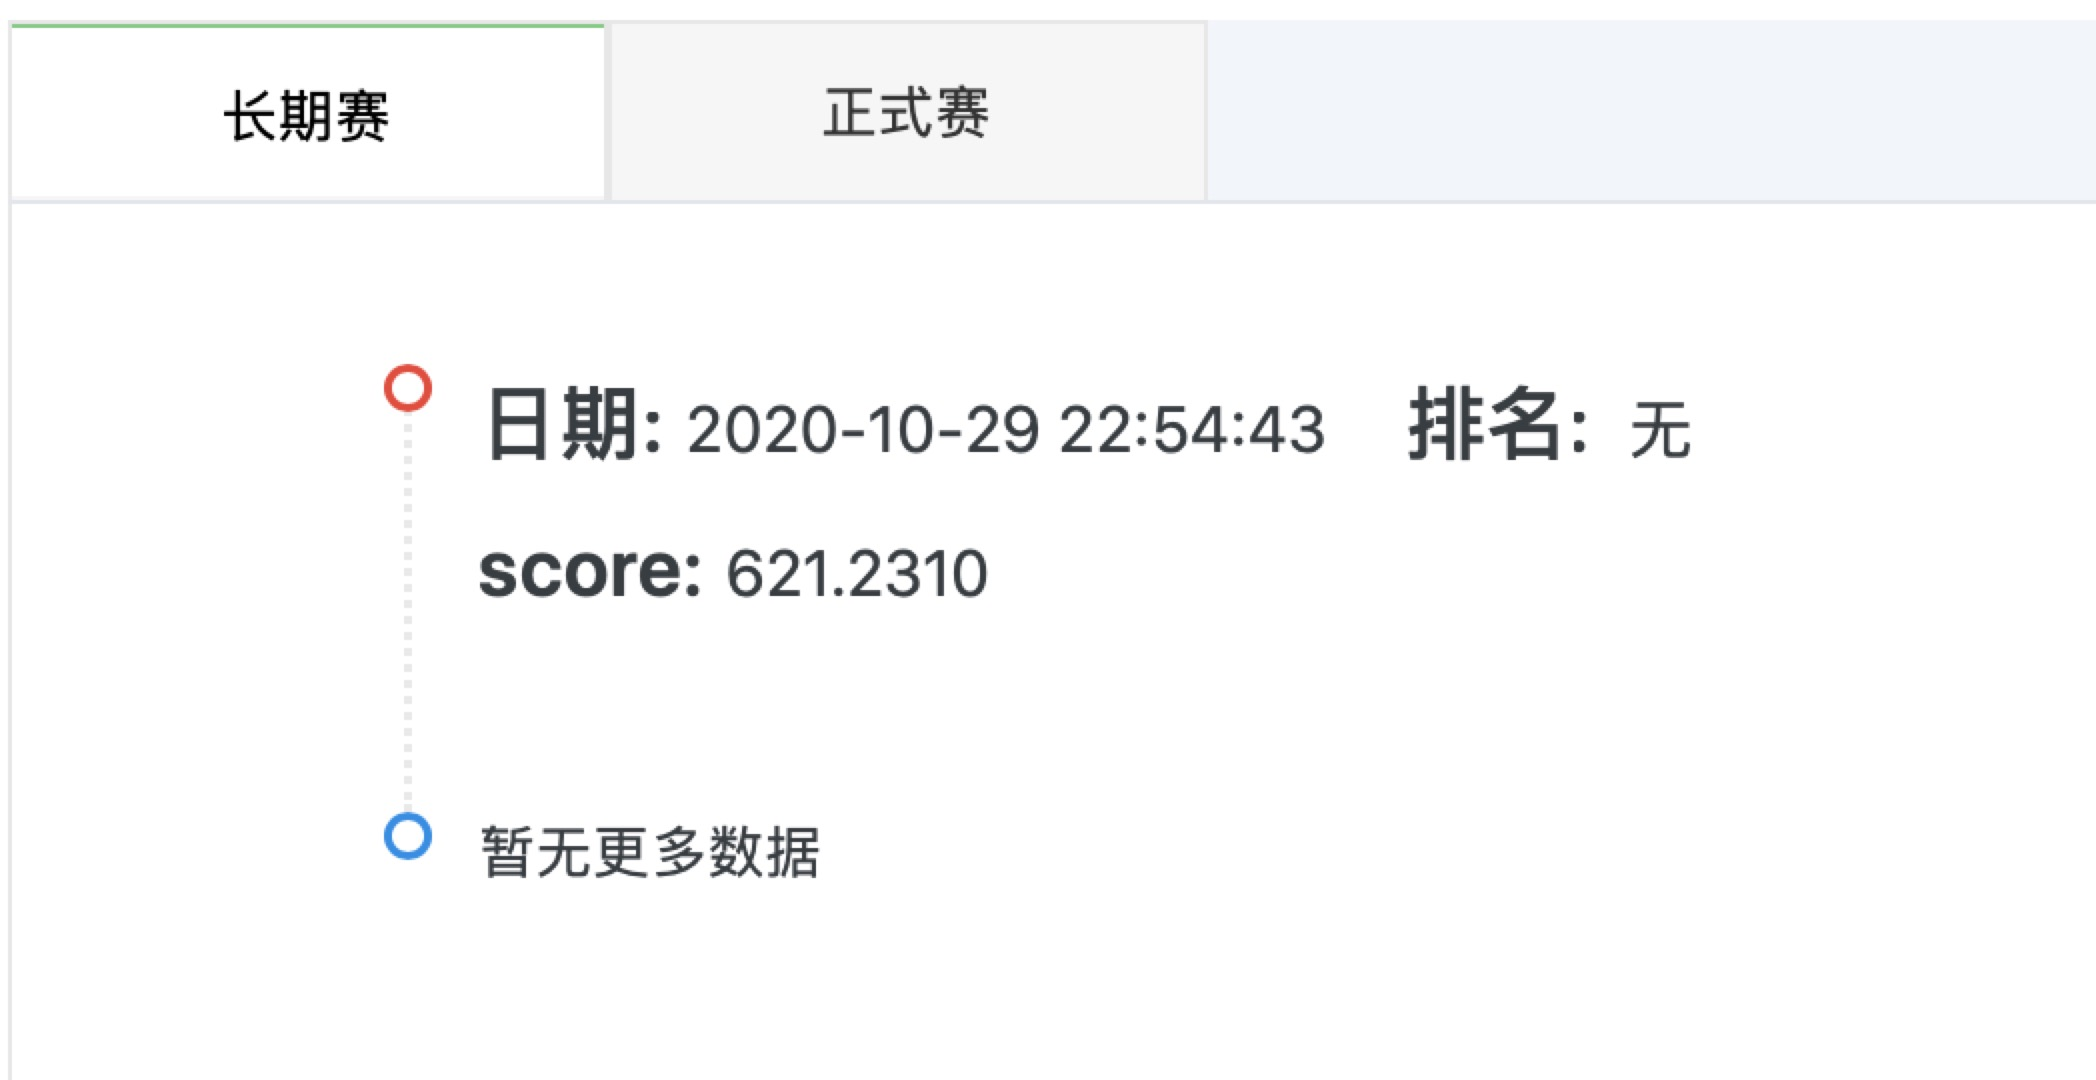

# Action2	"智能供应链分析

数据集：SupplyChainDataset.csv，供应链采购数据

To Do：

供应链数据探索"			

"1、探索性数据分析（50points）
"

In [37]:
dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [38]:
dataset.shape

(180519, 53)

In [39]:
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [43]:
dataset[['Customer Fname','Customer Lname']]
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset['Customer Full Name'].head()

0       CallyHolloway
1           IreneLuna
2    GillianMaldonado
3            TanaTate
4       OrliHendricks
Name: Customer Full Name, dtype: object

In [48]:
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'].isnull().sum()
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)

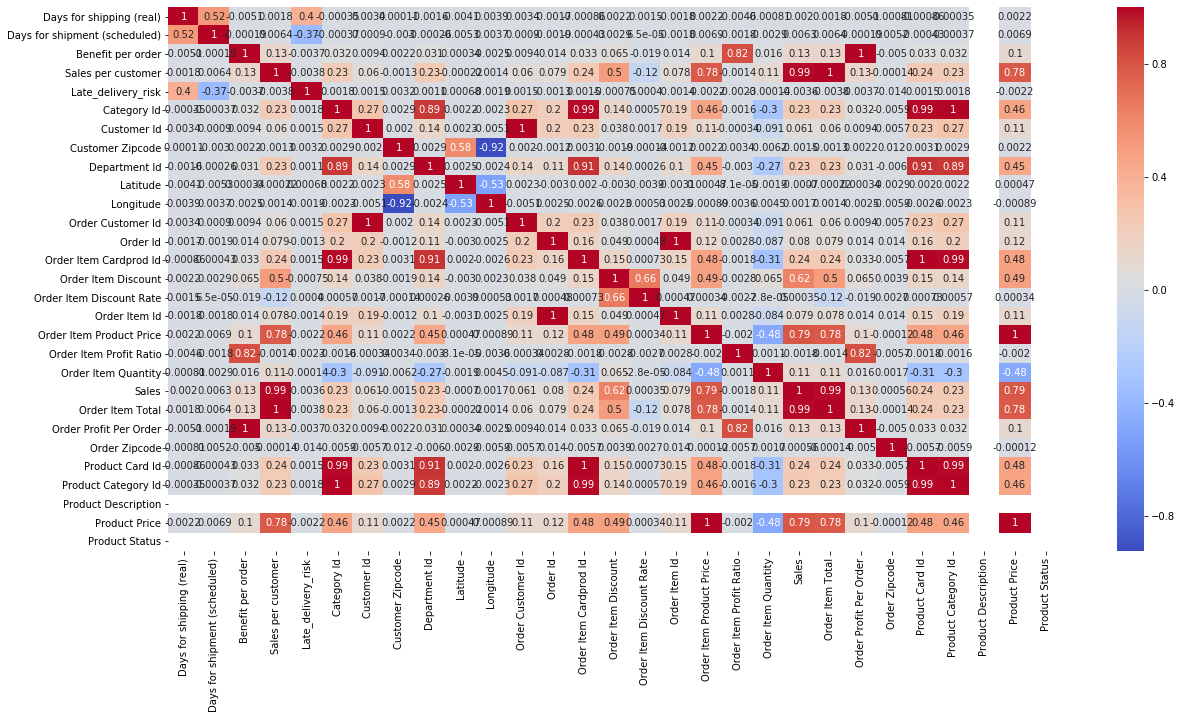

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

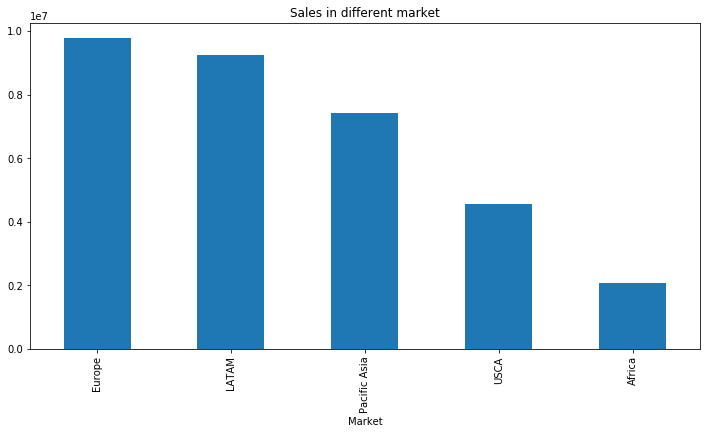

In [62]:
dataset['Market'].value_counts()
market = dataset.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different market')


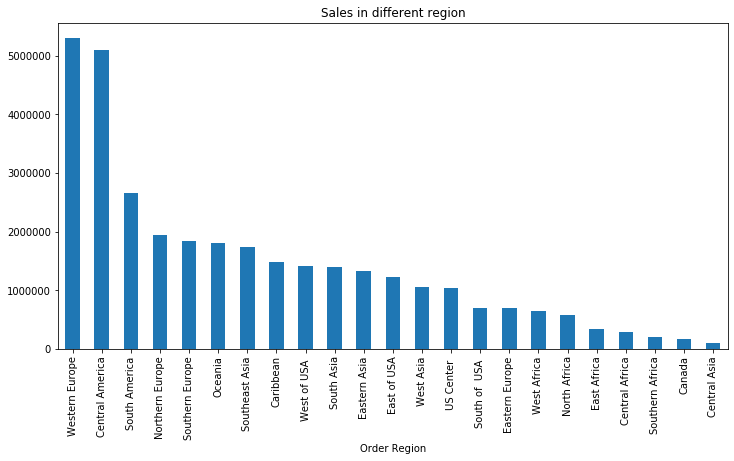

In [60]:
region = dataset.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different region')


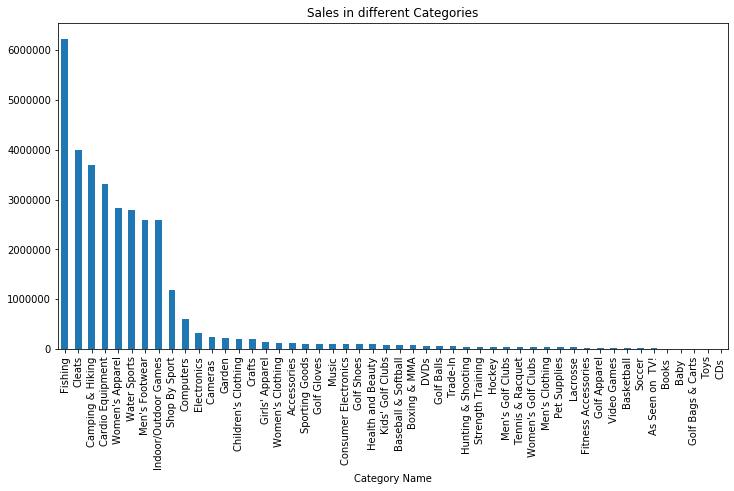

In [61]:
cat = dataset.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different Categories')


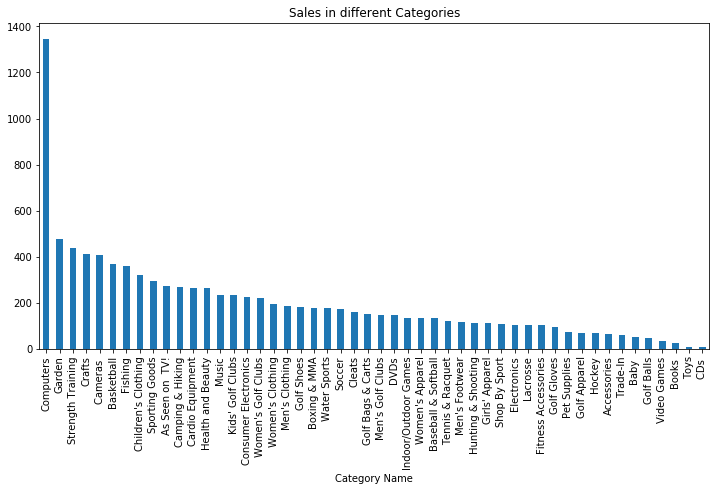

In [63]:
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different Categories')



In [69]:
temp = pd.DatetimeIndex(dataset['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [71]:
dataset['order_year'] = temp.year
dataset['order_month'] = temp.month
dataset['order_week_day'] = temp.weekday
dataset['order_hour'] = temp.hour
dataset['order_month_year'] = temp.to_period('M')
dataset[['order_year','order_month','order_week_day','order_hour','order_month_year']]


,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


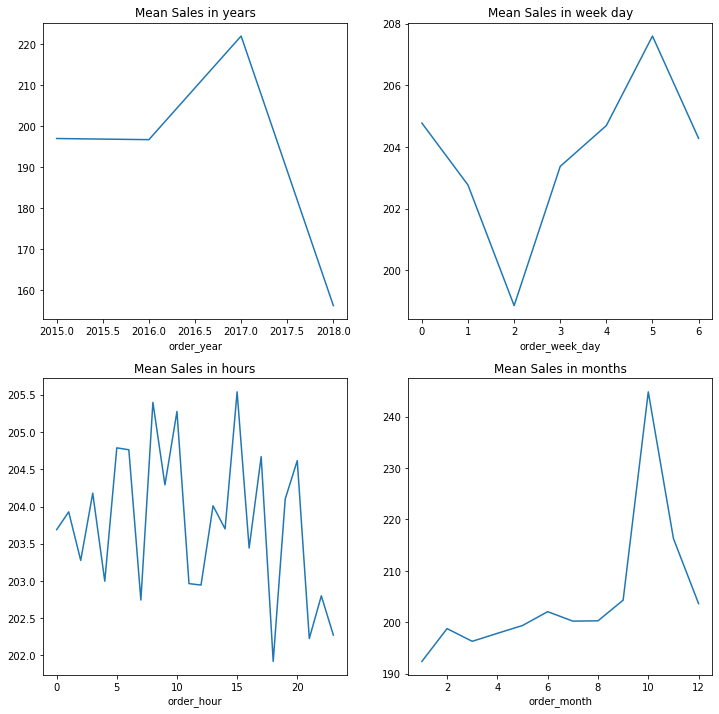

In [79]:
plt.figure(figsize=(10,20))

plt.subplot(2,2,1)
df_year = dataset.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in years')

plt.subplot(2,2,2)
df_day = dataset.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in week day')

plt.subplot(2,2,3)
df_hour = dataset.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in hours')

plt.subplot(2,2,4)
df_month = dataset.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12),title='Mean Sales in months')



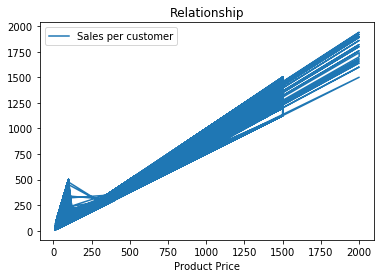

In [81]:
dataset.plot(x='Product Price',y='Sales per customer',title='Relationship')
